Objective<br>
Explore the dataset to identify differences between the customers of each product. You can also explore relationships between the different attributes of the customers. You can approach it from any other line of questioning that you feel could be relevant for the business. The idea is to get you comfortable working in Python.

You are expected to do the following :
*   Come up with a customer profile (characteristics of a customer) of the different products
*   Perform univariate and multivariate analyses
*   Generate a set of insights and recommendations that will help the company in targeting new customers.








Data Dictionary<br>
The data is about customers of the treadmill product(s) of a retail store called Cardio Good Fitness. It contains the following variables-

* Product - The model no. of the treadmill
* Age -  Age of the customer in no of years
* Gender - Gender of the customer
* Education - Education of the customer in no. of years
* Marital Status - Marital status of the customer
* Usage - Avg. # times the customer wants to use the treadmill every week
* Fitness - Self rated fitness score of the customer (5 - very fit, 1 - very unfit)
* Income - Income of the customer
* Miles- Miles that a customer expects to run

## load libraries

In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## load the file

In [2]:
df = pd.read_csv('CardioGoodFitness.csv') # read the input dataset
df.head() # check first 5 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [3]:
df.tail() # check last 5 rows

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120
179,TM798,48,Male,18,Partnered,4,5,95508,180


In [4]:
df.shape # check number of rows and columns

(180, 9)

There are 180 rows (observations) and 9 columns (features)

## Checking data types of the columns 

In [5]:
df.info() # check the data types and if there are any null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


Key points:  
* There are total 9 Columns, 3 of them are of objects data types and 6 are of int data types
* There are no null values

## Getting the statistical summary of the dataset

In [6]:
## statistical summary of all object columns

df.describe(include='object').T

,count,unique,top,freq
Product,180,3,TM195,80
Gender,180,2,Male,104
MaritalStatus,180,2,Partnered,107


In [7]:
## check values of categorical variables

cat_cols = ['Product','Gender','MaritalStatus']

for cols in cat_cols:
  print(df[cols].value_counts(normalize=True))
  print('')

TM195    0.444444
TM498    0.333333
TM798    0.222222
Name: Product, dtype: float64

Male      0.577778
Female    0.422222
Name: Gender, dtype: float64

Partnered    0.594444
Single       0.405556
Name: MaritalStatus, dtype: float64



Key points:
* TM195 is the most commonly used (44.44 %) Trademill model used by customers, followed by TM498 (33.33 %) and lastly TM798 (22.22%)
* 57.78 % of customers are male and 42.22 % are female
* 59.44 % of customers have partners and 40.55% are single

In [8]:
## statistical summary of all integer columns

df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,180.0,28.788889,6.943498,18.0,24.00,26.0,33.00,50.0
Education,180.0,15.572222,1.617055,12.0,14.00,16.0,16.00,21.0
Usage,180.0,3.455556,1.084797,2.0,3.00,3.0,4.00,7.0
Fitness,180.0,3.311111,0.958869,1.0,3.00,3.0,4.00,5.0
Income,180.0,53719.577778,16506.684226,29562.0,44058.75,50596.5,58668.00,104581.0
Miles,180.0,103.194444,51.863605,21.0,66.00,94.0,114.75,360.0


Key Points based on data:
* Minimum age of Trademill Customers is 18 and max is 50, with average age of 28.78 and median of 26. 
* Trademill Customers have min of 12 years of education and max of 21 years of education, with average education of 15.57 years and median 16 years
* Numer of times customers want to use trademil in a week varies between 2 and 7, with average 3.45 and 50% of customers want to use at least 3 times a week
* Income of the customers varies between 29,562 to 104,581, with average income of 53,719 and median income of 50,596
* Customers expect to run average of 103.19 miles, overall range of miles varies from 21 miles to 360 miles
* Average fitness score is 3.31, min is 1 and max is 5 with at least 50% at 3

In [9]:
## Fitness should ideally be categorical variable, lets see the count of unique values 
df.Fitness.value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

* Almost 53.89% of customers have rated their fitness score of 3, followed by 17.22% rated at 5 (very fit), and 14.44% rated at 2

## Univariate Analysis 

### Observations on Age

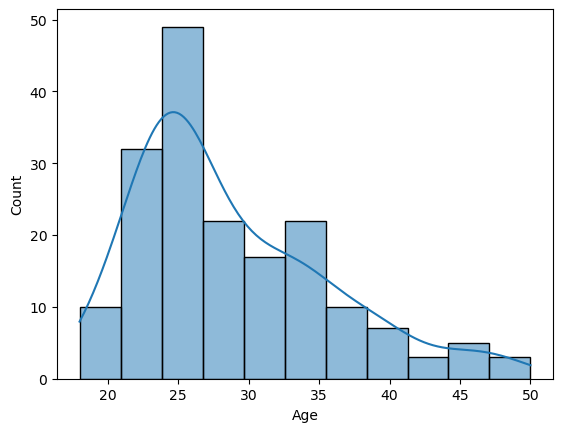

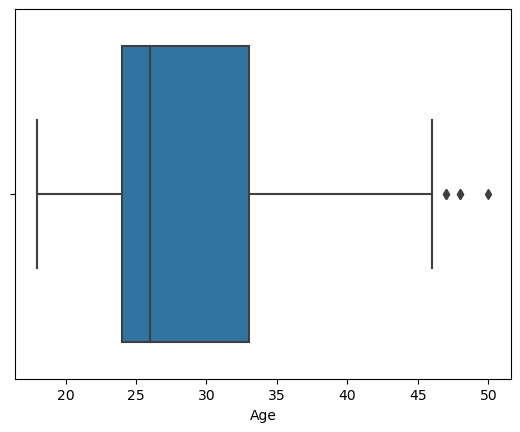

In [10]:
sns.histplot(data=df,x='Age',kde=True); # check distribution of Age
plt.show()
sns.boxplot(data=df,x='Age');
plt.show()

* The distribution of Age is right skewed, with few outliers
* Most of the customers are between age 21 to 27

### Observations on Education

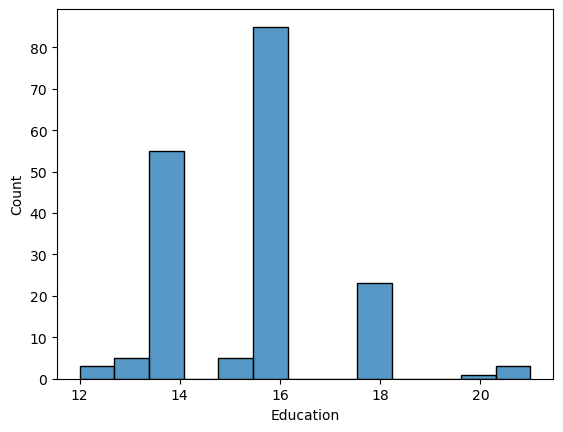

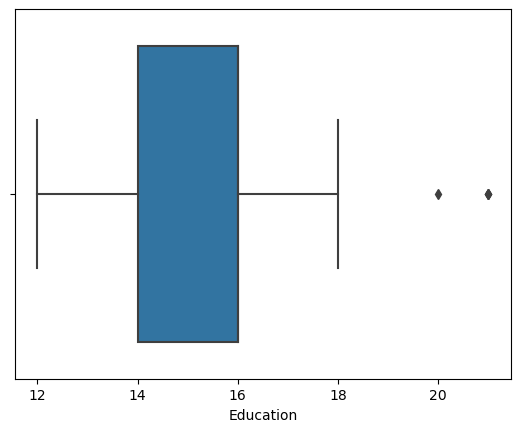

In [11]:
sns.histplot(data=df,x='Education');
plt.show()
sns.boxplot(data=df,x='Education');
plt.show()

* Most of the customers (greater than 80 customers) have around 16 years of education
* Data is right skewed, some have even 21 years of education

### Observations on Usage

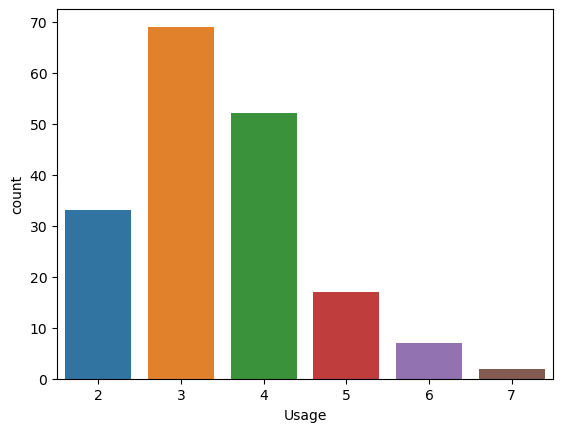

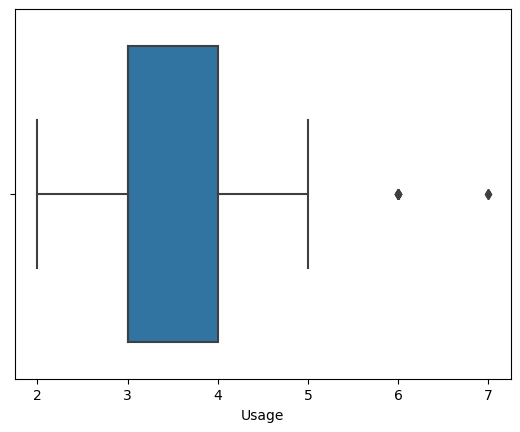

In [12]:
sns.countplot(data=df,x='Usage'); # countplot for Usage, as this also should be categorical variable
plt.show()
sns.boxplot(data=df,x='Usage');
plt.show()

In [13]:
df.Usage.value_counts(normalize=True)

3    0.383333
4    0.288889
2    0.183333
5    0.094444
6    0.038889
7    0.011111
Name: Usage, dtype: float64

* Trademils usase data is right skewed, with few outliers
* 38.33% of customers wants to use the trademill 3 times a week 

### Observations on Fitness

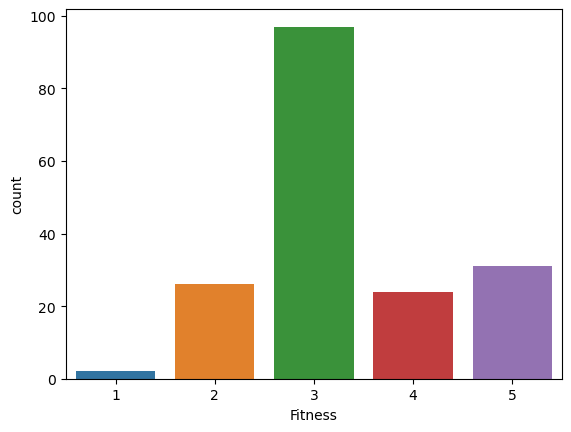

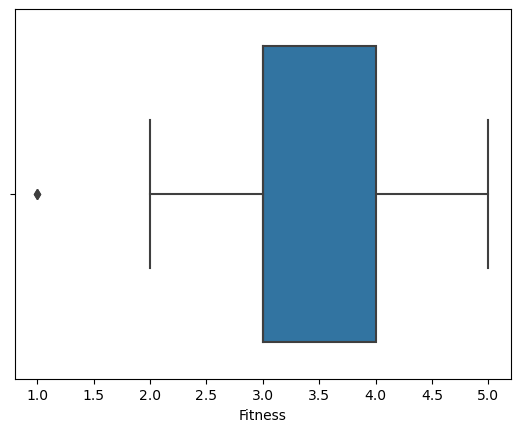

In [14]:
sns.countplot(data=df,x='Fitness'); # countplot for Fitness, as this also should be categorical variable
plt.show()
sns.boxplot(data=df,x='Fitness');
plt.show()

In [15]:
df.Fitness.value_counts(normalize=True)

3    0.538889
5    0.172222
2    0.144444
4    0.133333
1    0.011111
Name: Fitness, dtype: float64

* As we had seen previously - Almost 53.89% of customers have rated their fitness score of 3, followed by 17.22% rated at 5, and 14.44% rated at 2. Above charts shows similar trends
* Data is left skewed, with two customers rated them as very unfit (Fitness - 1)

## Observation on Income

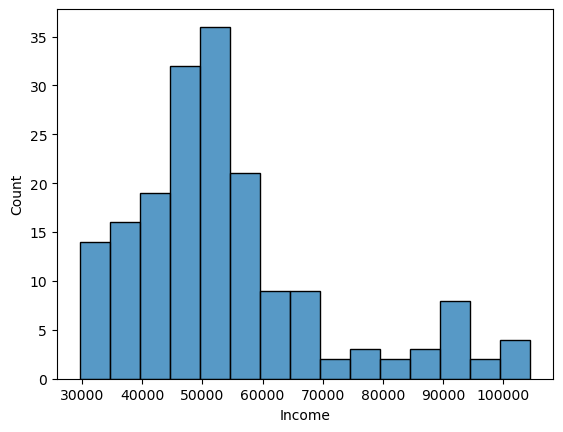

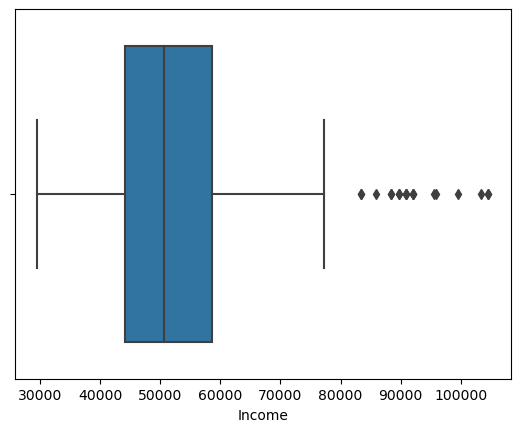

In [16]:
sns.histplot(data=df,x='Income');
plt.show()
sns.boxplot(data=df,x='Income');
plt.show()

* Distribution of Income is right skewed
* There are lot of outliers 
* 50% of customers have income less than approx 50k

## Observation on Miles

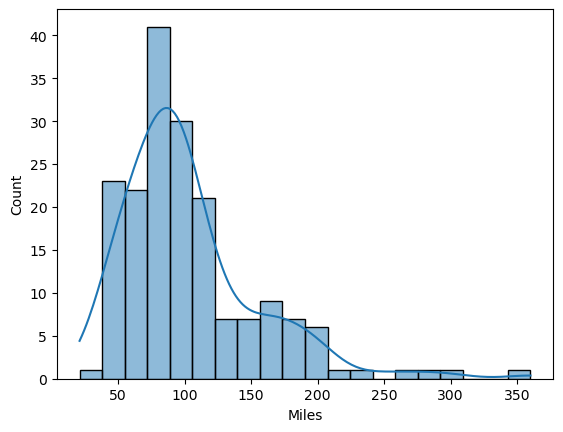

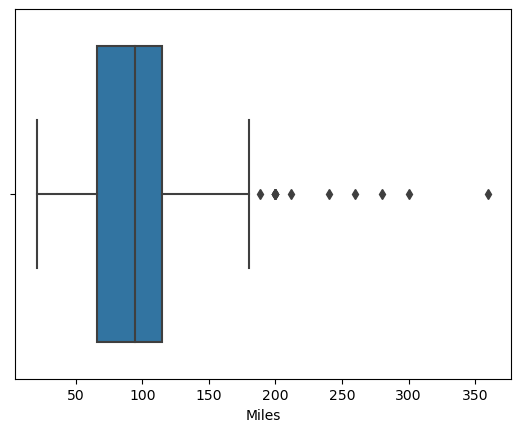

In [17]:
sns.histplot(data=df,x='Miles',kde=True);
plt.show()
sns.boxplot(data=df,x='Miles');
plt.show()

* Distribution of Miles is right skewed, and there are outliers
* 50% of customers expects to run less than 100 miles

Lets explore categorical columns

## Observation on Product

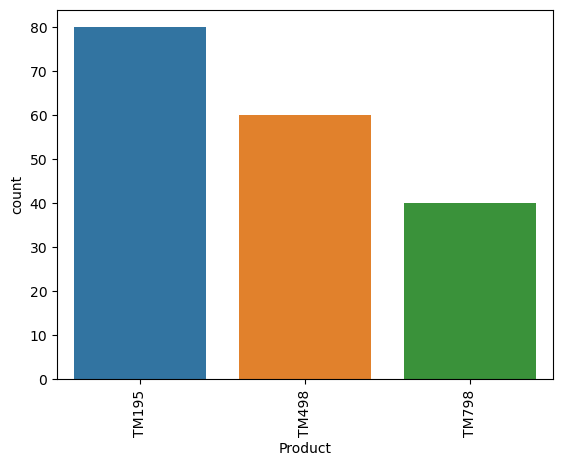

In [18]:
sns.countplot(data=df, x='Product')
plt.xticks(rotation=90);

* TM195 model of trademill is very popular amoung most of the customers (44%) 

## Observation on Gender

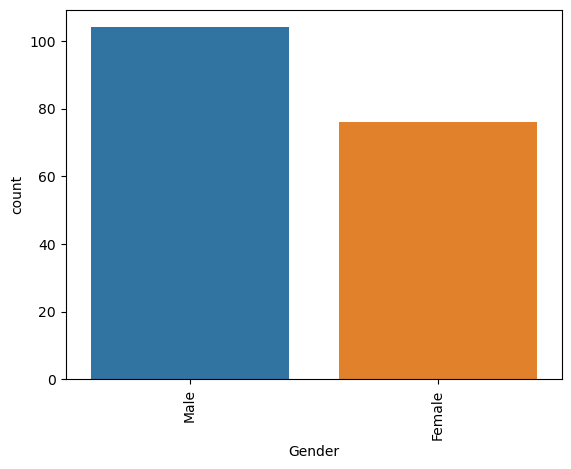

In [19]:
sns.countplot(data=df, x='Gender')
plt.xticks(rotation=90);

* Male Customers are greater than Female customers

## Observation on Marital Status

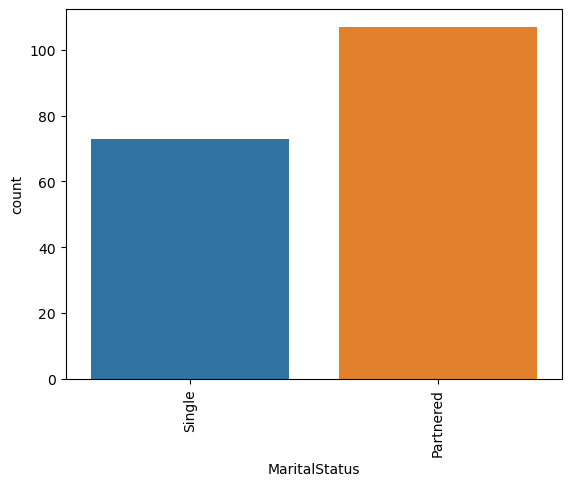

In [20]:
sns.countplot(data=df, x='MaritalStatus')
plt.xticks(rotation=90);

* Majority of customers of trademill have partners 

## Bivariate Analayis

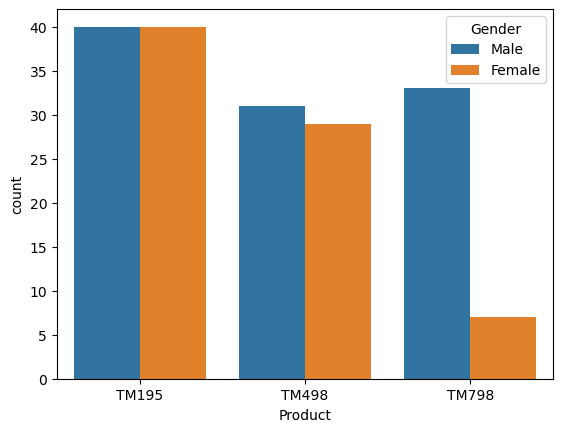

In [21]:
# Product and Gender
sns.countplot(data=df,x='Product',hue='Gender');

* TM195 is equally popular amoung males and females
* Very few females use TM798


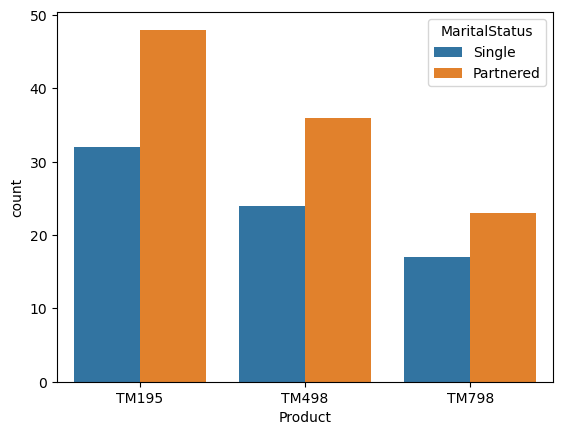

In [22]:
# Product and Marital Status
sns.countplot(data=df,x='Product',hue='MaritalStatus');

* Selection of Product doesn't seem to be impacted by Marital Status

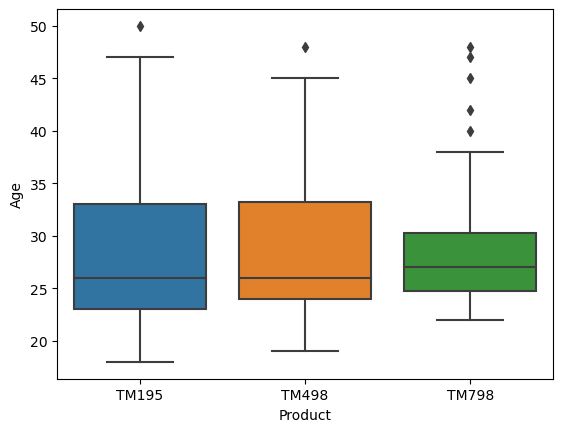

In [23]:
# between Product and Age
sns.boxplot(data=df,x='Product',y='Age');

* TM195 and TM498 are mostly used by young population with age less than 33
* 75% of users for TM798 are less than 30 years of age, there are few outliers

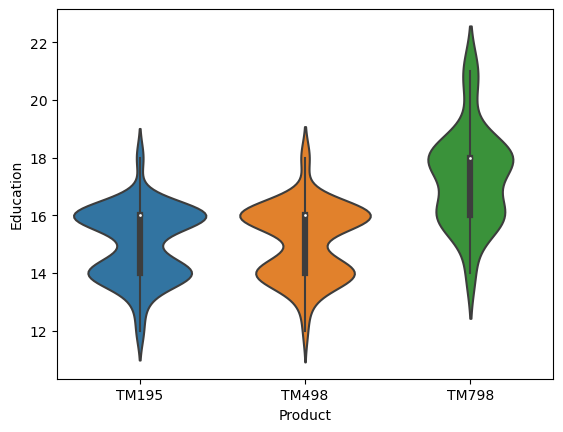

In [24]:
# between Product and Education
sns.violinplot(data=df,x='Product',y='Education');

* TM798 is used by Customers who have more years of Education

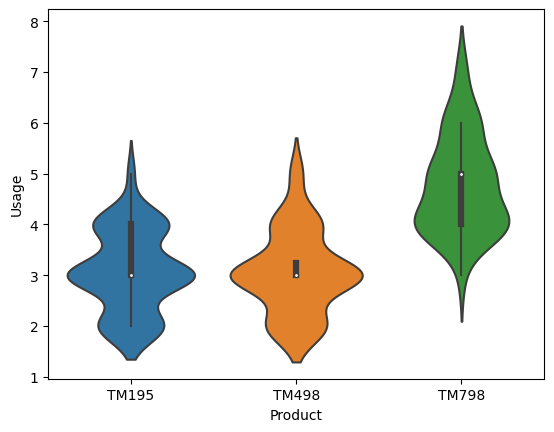

In [25]:
# between Product and Usage
sns.violinplot(data=df,x='Product',y='Usage');

* Customers who plans to use Trademill more frequently buy model TM798

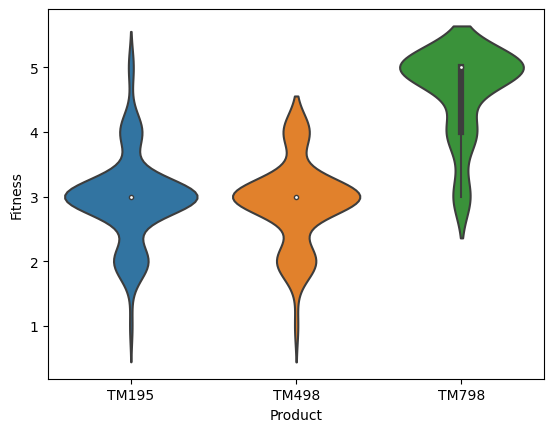

In [26]:
# between Product and Fitness
sns.violinplot(data=df,x='Product',y='Fitness');

* Customers who have rated higher fitness, uses TM798 model

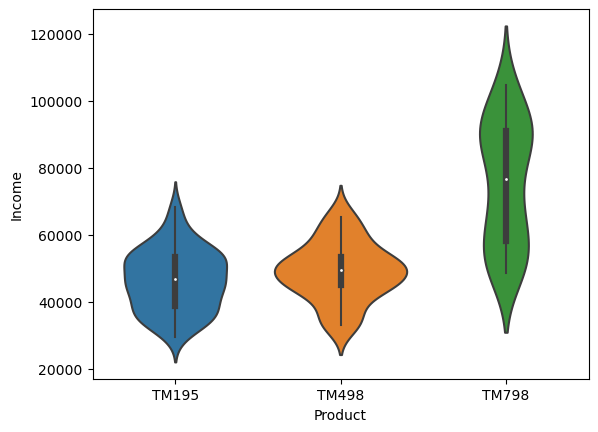

In [27]:
# between Product and Income
sns.violinplot(data=df,x='Product',y='Income');

* Customers with higher income use TM798 model

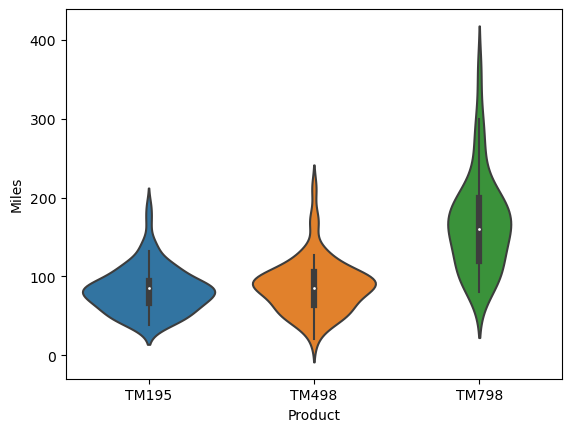

In [28]:
# between Product and Miles
sns.violinplot(data=df,x='Product',y='Miles');

* Customers wanting to run higher miles, prefer TM798 model

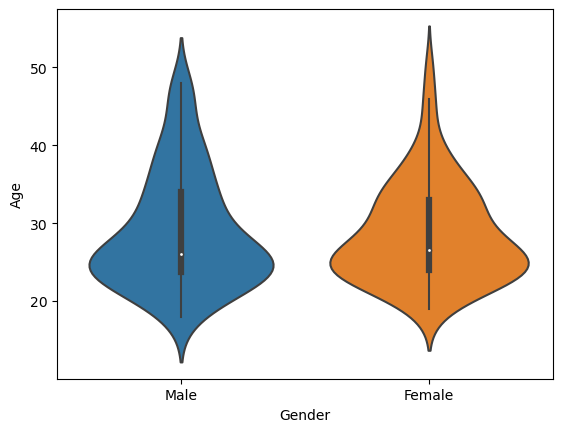

In [29]:
sns.violinplot(data=df,x='Gender',y='Age');

* Both Males and Females have similar age distribution

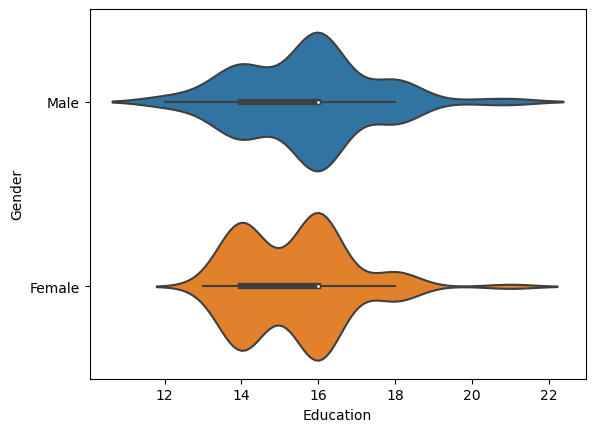

In [30]:
sns.violinplot(data=df,x='Education',y='Gender');

* Both Male and Females have similar median education, however range is higher for males

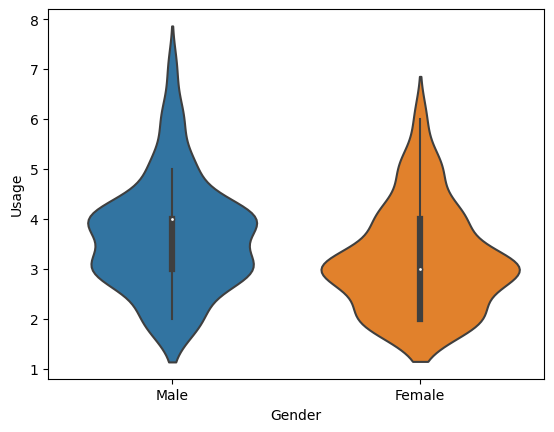

In [31]:
sns.violinplot(data=df,x='Gender',y='Usage');

In [32]:
df.groupby('Gender')['Usage'].median()

Gender
Female    3.0
Male      4.0
Name: Usage, dtype: float64

* Males have higher usage than Females (Median for Male is around 4 and Female is around 3)

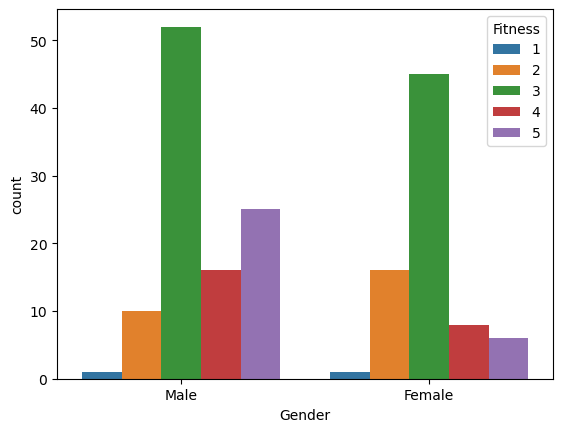

In [33]:
sns.countplot(data=df,x='Gender',hue='Fitness');

In [34]:
df.groupby('Gender')['Fitness'].mean()

Gender
Female    3.026316
Male      3.519231
Name: Fitness, dtype: float64

* Males rate themselves at higher fitness level

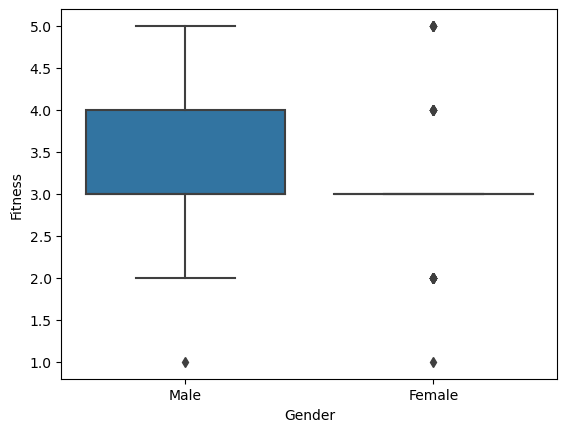

In [35]:
sns.boxplot(data=df,x='Gender',y='Fitness');

* Males have higher fitness level than females

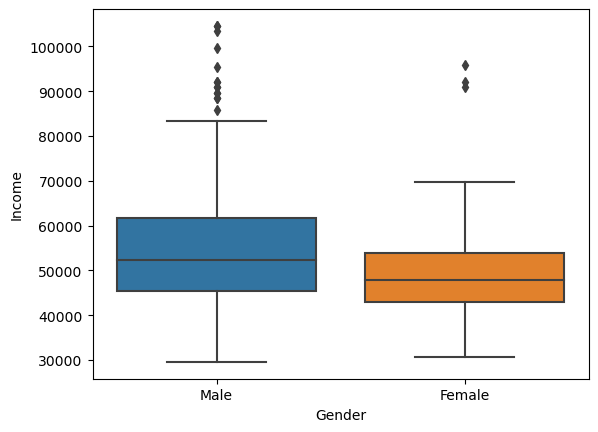

In [36]:
sns.boxplot(data=df,x='Gender',y='Income');

In [37]:
df.groupby('Gender')['Income'].mean()

Gender
Female    49828.907895
Male      56562.759615
Name: Income, dtype: float64

* Males have slightly higher income than Females

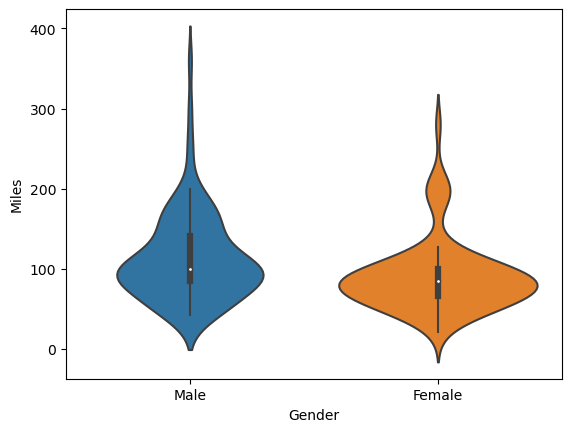

In [38]:
sns.violinplot(data=df,x='Gender',y='Miles');

In [39]:
df.groupby('Gender')['Miles'].mean()

Gender
Female     90.013158
Male      112.826923
Name: Miles, dtype: float64

* Males intends to run higher Mileage than Females

* Customers who plans to use Trademill more frequently buy model TM798

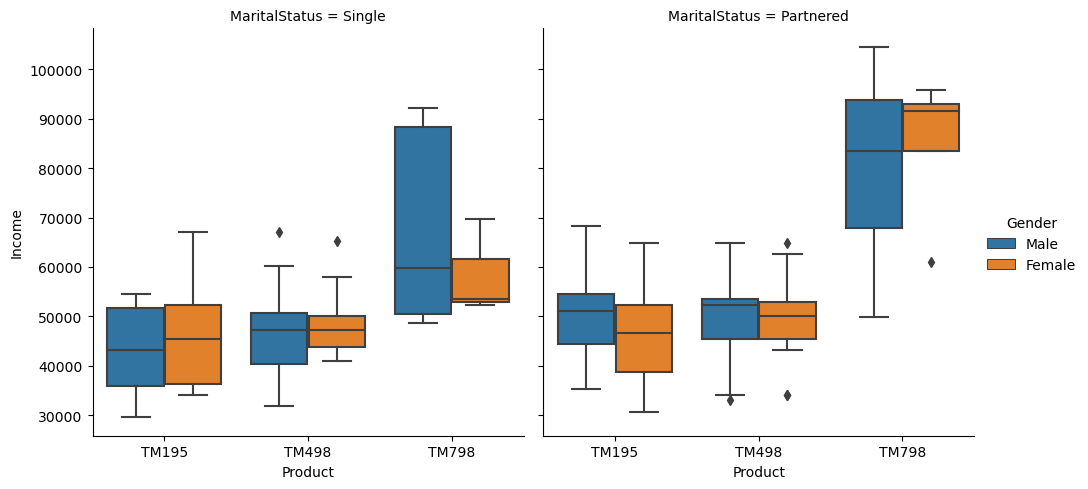

In [40]:
sns.catplot(data=df,x='Product',y='Income',hue='Gender',col='MaritalStatus',kind='box');

* There is clear indication that customers with higher income tends to use model TM798
* Higher income Females with partners clearly use TM798
* Models TM195 and TM498 are mostly used by customers with income around 50K or less, gender doesn't seem to have any impact

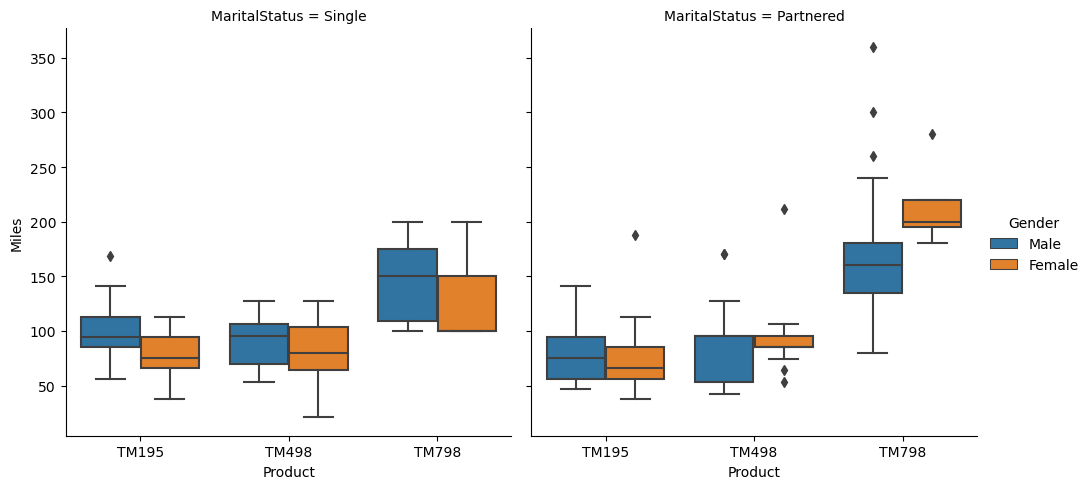

In [41]:
sns.catplot(data=df,x='Product',y='Miles',hue='Gender',col='MaritalStatus',kind='box');

* There is clear indication that customers who have higher income use model TM798. Their Marital Status doesn't seem have any impact. 
* Models TM195 and TM498 are mostly used by customers who runs around 100 miles or less, Marital Status doesn't seem to have any impact

In [42]:
# lets look at Females who use TM798 and have high incomes, are they same who is running high mileage

df[(df['Product']=='TM798') & (df['Gender'] =='Female')]

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
144,TM798,23,Female,18,Single,5,4,53536,100
148,TM798,24,Female,16,Single,5,5,52291,200
152,TM798,25,Female,18,Partnered,5,5,61006,200
157,TM798,26,Female,21,Single,4,3,69721,100
162,TM798,28,Female,18,Partnered,6,5,92131,180
167,TM798,30,Female,16,Partnered,6,5,90886,280
171,TM798,33,Female,18,Partnered,4,5,95866,200


* there are 2 females with partners who have very high income and high income - outliers

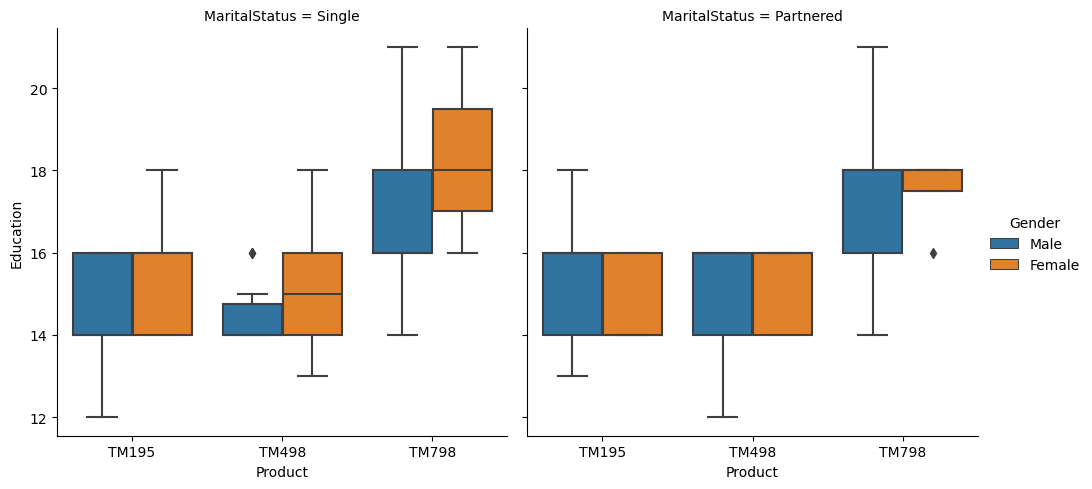

In [43]:
sns.catplot(data=df,x='Product',y='Education',hue='Gender',col='MaritalStatus',kind='box');

* There is clear indication that customers who have higher number of years of Education use model TM798.
* Models TM195 and TM498 are mostly used by customers who runs around 100 miles or less, Marital Status doesn't seem to have any impact

<Figure size 2000x700 with 0 Axes>

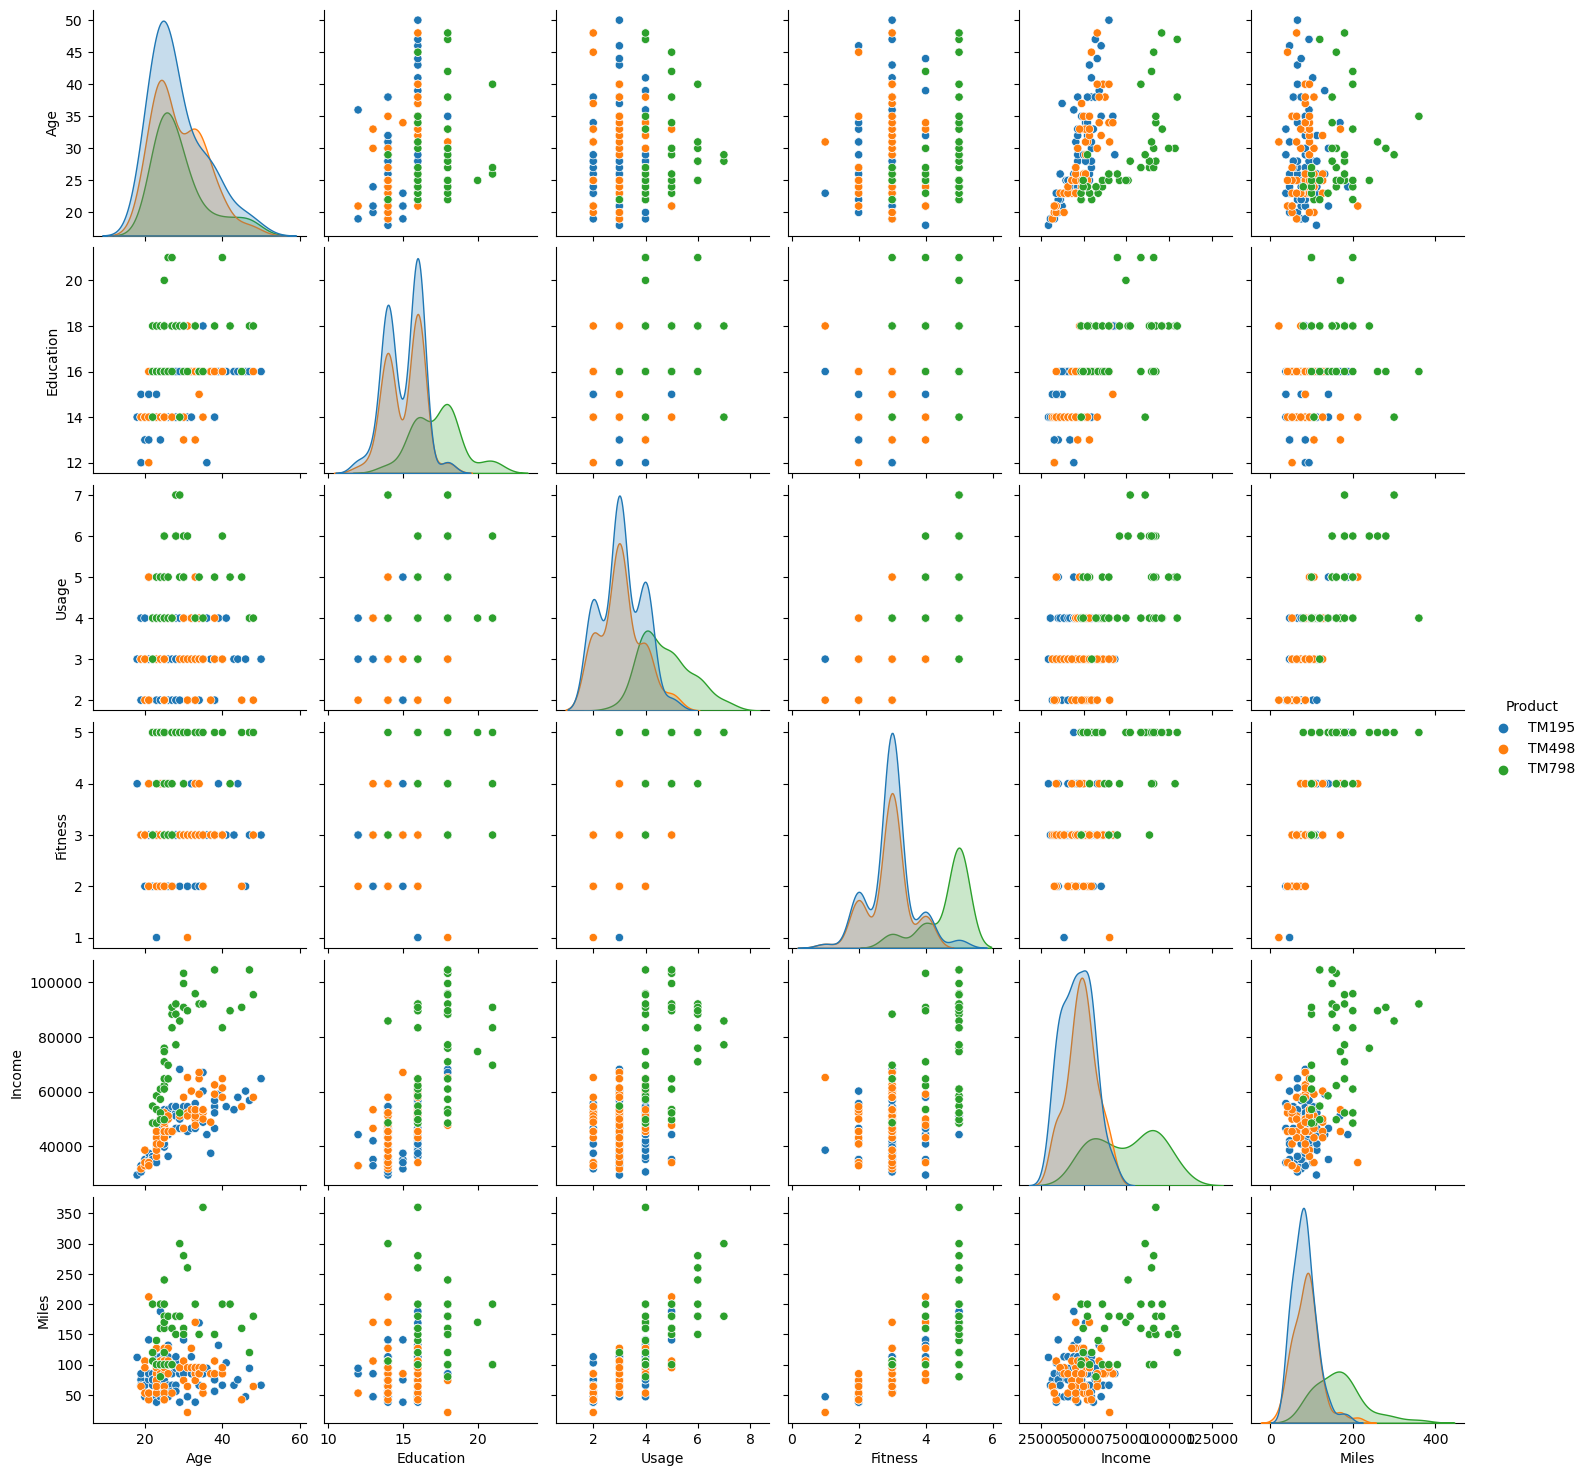

In [44]:
# between 
plt.figure(figsize=(20,7));
sns.pairplot(data=df,vars=['Age','Education','Usage','Fitness','Income','Miles'],hue='Product',diag_kind='kde');

/var/folders/vq/s1j96hqn2_99q30y1hw_1dgw0000gn/T/ipykernel_16447/1351150679.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);


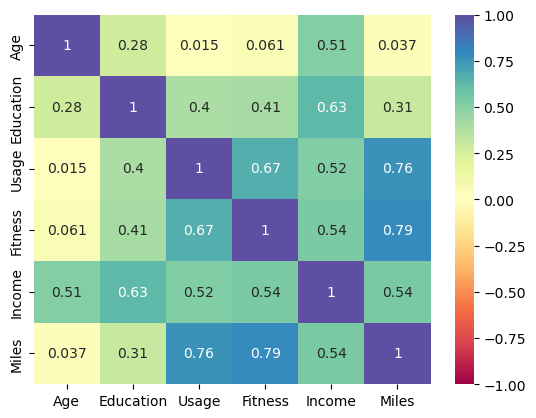

In [45]:
sns.heatmap(df.corr(),annot=True,cmap='Spectral',vmin=-1,vmax=1);

* From the diagonal chart, its clear, Product TM798 is preferred by customers, who have higher number of years of education, where Usage is higher, FItness level is higher, Income is higher, more miles. 
* There is not much trend for other remaining trademil, except TM195 is used most
* There is positive corrilation between Income and Age, Income and Miles, Income and number of years of education, Fitness and Educaiton, Income and Fitness, Fitness and Miles.. 

* Both Males and Females with higher income, whether they are married or not, prefers product TM798

Lets convert Age into categorical variable as follows
* Between 18 - 28 - Young
* Between 29 - 39 - Middle
* Between 40 - 50 - Senior


In [46]:
bins = np.linspace(min(df['Age']),max(df['Age']),4)
age_group_names = ['Young','Middle','Senior']
df['Age-binned'] = pd.cut(df['Age'],bins,labels=age_group_names,include_lowest=True)

In [47]:
df.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles,Age-binned
0,TM195,18,Male,14,Single,3,4,29562,112,Young
1,TM195,19,Male,15,Single,2,3,31836,75,Young
2,TM195,19,Female,14,Partnered,4,3,30699,66,Young
3,TM195,19,Male,12,Single,3,3,32973,85,Young
4,TM195,20,Male,13,Partnered,4,2,35247,47,Young


In [48]:
bins

array([18.        , 28.66666667, 39.33333333, 50.        ])

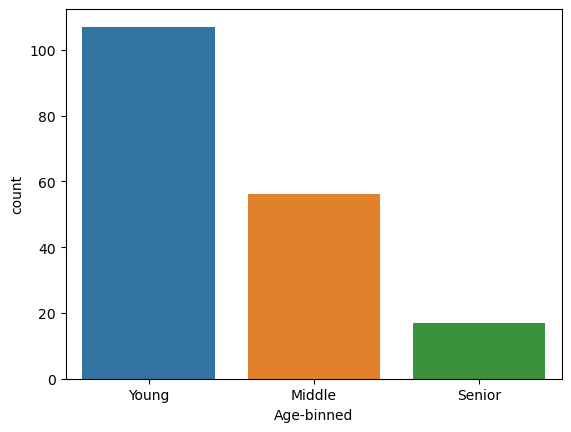

In [49]:
sns.countplot(data=df,x='Age-binned');

In [50]:
df['Age-binned'].value_counts(normalize=True)

Young     0.594444
Middle    0.311111
Senior    0.094444
Name: Age-binned, dtype: float64

* 59% of the customers are young with age between 18 and 28, 31% is middle aged, and only 9% as senior

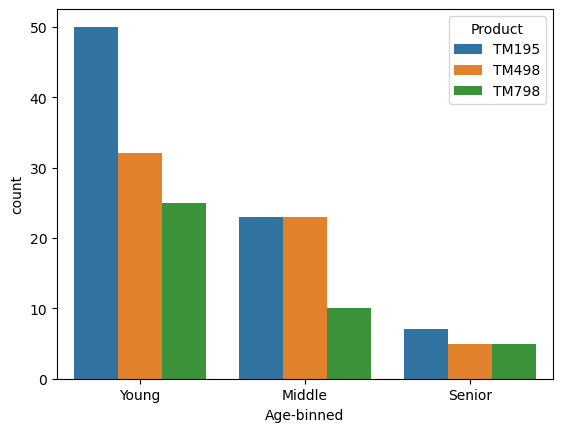

In [51]:
# lets check the preference of Trademill by the new column 

sns.countplot(data=df,x='Age-binned',hue='Product');

* For senior customers in the range 40 to 50, there is no preference of Trademill models

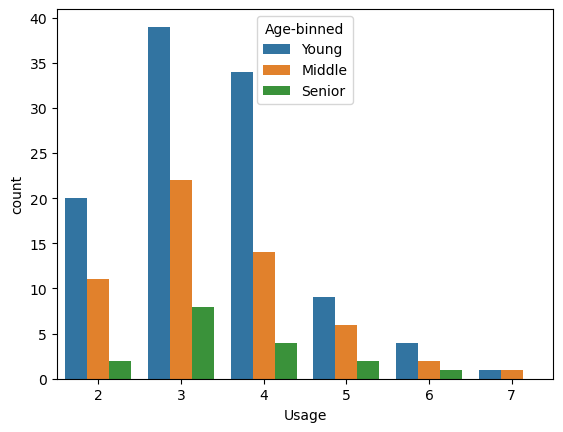

In [52]:
# lets explore usage by age group

sns.countplot(data=df,x='Usage',hue='Age-binned');

* 59% of the customers are young with age between 18 and 28, 31% is middle aged, and only 9% as senior
* For senior customers in the range 40 to 50, there is no preference of Trademill models

Lets break the income into 3 categories just like age
* Low-Income - 29K - 54K
* Medium-Income - 55K - 79K
* High-Income - 80K - 104K

In [53]:
bins_income = np.linspace(min(df['Income']),max(df['Income']),4)
income_group_names = ['Low-Income','Medium-Imcome','High-Income']
df['Income-binned'] = pd.cut(df['Income'],bins_income,labels=income_group_names,include_lowest=True)

In [54]:
bins_income

array([ 29562.        ,  54568.33333333,  79574.66666667, 104581.        ])

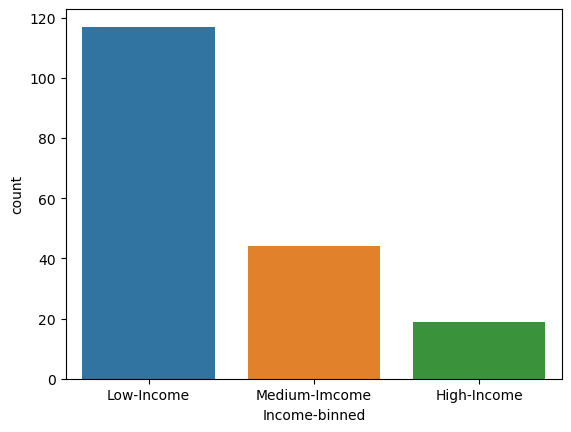

In [55]:
sns.countplot(data=df,x='Income-binned');

In [56]:
df['Income-binned'].value_counts(normalize=True)

Low-Income       0.650000
Medium-Imcome    0.244444
High-Income      0.105556
Name: Income-binned, dtype: float64

* 65% customers are low income (in range 29K - 54K) 

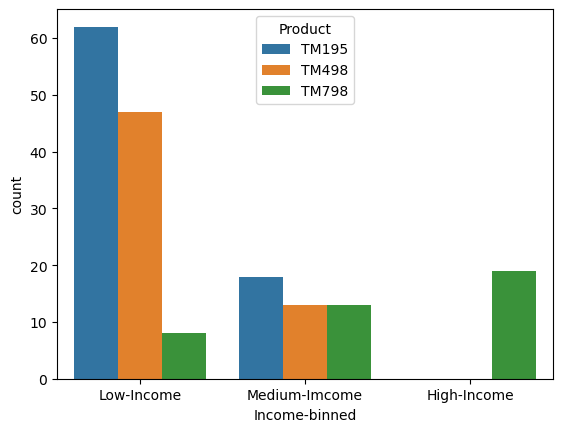

In [57]:
# lets check the preference of Trademill by the new income column 

sns.countplot(data=df,x='Income-binned',hue='Product');

* Clearly high income prefers TM798  model
* Most of the low income prefers TM195 which is most selling and TM498
* Medium income category do not have preference on the Model

# Customer profile of the different products

<AxesSubplot:xlabel='Product', ylabel='Income'>

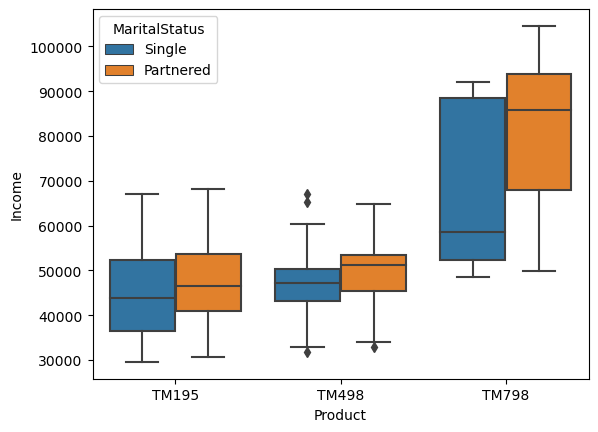

In [58]:
sns.boxplot(data=df,x='Product',y='Income',hue='MaritalStatus')

* TM798 is used by high income customers for both Marital Status

<AxesSubplot:xlabel='Product', ylabel='Income'>

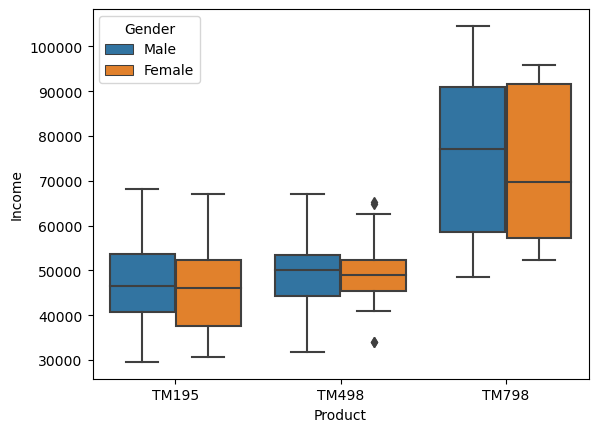

In [59]:
sns.boxplot(data=df,x='Product',y='Income',hue='Gender')

* TM798 is used by high income customers for both Male and Females

<AxesSubplot:xlabel='Product', ylabel='Miles'>

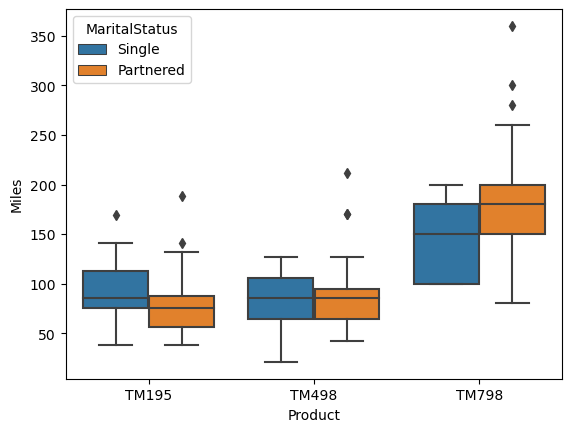

In [60]:
sns.boxplot(data=df,x='Product',y='Miles',hue='MaritalStatus')

* TM798 customers run higher miles for both Marital Status

<AxesSubplot:xlabel='Product', ylabel='Miles'>

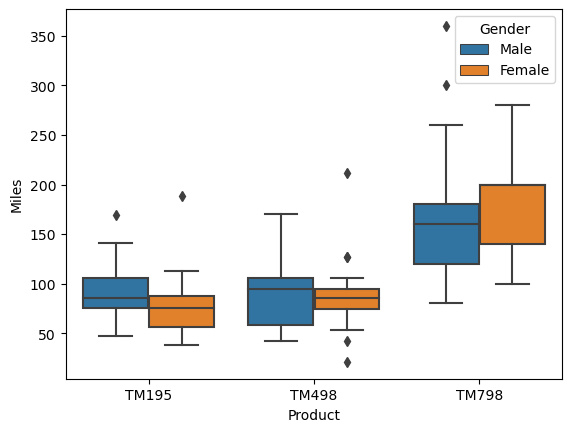

In [61]:
sns.boxplot(data=df,x='Product',y='Miles',hue='Gender')

* TM798 customers run higher miles for both Genders

In [62]:
df.groupby('Product',as_index=False)['Age','Education','Usage','Fitness','Income','Miles'].min()

/var/folders/vq/s1j96hqn2_99q30y1hw_1dgw0000gn/T/ipykernel_16447/2445043624.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Product',as_index=False)['Age','Education','Usage','Fitness','Income','Miles'].min()


,Product,Age,Education,Usage,Fitness,Income,Miles
0,TM195,18,12,2,1,29562,38
1,TM498,19,12,2,1,31836,21
2,TM798,22,14,3,3,48556,80


In [63]:
df.groupby('Product')['Age','Education','Usage','Usage','Fitness','Income','Miles'].mean()

/var/folders/vq/s1j96hqn2_99q30y1hw_1dgw0000gn/T/ipykernel_16447/3553089614.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Product')['Age','Education','Usage','Usage','Fitness','Income','Miles'].mean()


,Age,Education,Usage,Usage,Fitness,Income,Miles
Product,,,,,,,
TM195,28.55,15.037500,3.087500,3.087500,2.9625,46418.025,82.787500
TM498,28.90,15.116667,3.066667,3.066667,2.9000,48973.650,87.933333
TM798,29.10,17.325000,4.775000,4.775000,4.6250,75441.575,166.900000


In [64]:
df.groupby('Product')['Age','Education','Usage','Usage','Fitness','Income','Miles'].max()

/var/folders/vq/s1j96hqn2_99q30y1hw_1dgw0000gn/T/ipykernel_16447/36719339.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Product')['Age','Education','Usage','Usage','Fitness','Income','Miles'].max()


,Age,Education,Usage,Usage,Fitness,Income,Miles
Product,,,,,,,
TM195,50,18,5,5,5,68220,188
TM498,48,18,5,5,4,67083,212
TM798,48,21,7,7,5,104581,360


In [65]:
df.groupby('Product')['Age','Education','Usage','Usage','Fitness','Income','Miles'].quantile([0.25,0.5,0.75])

/var/folders/vq/s1j96hqn2_99q30y1hw_1dgw0000gn/T/ipykernel_16447/3206891344.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  df.groupby('Product')['Age','Education','Usage','Usage','Fitness','Income','Miles'].quantile([0.25,0.5,0.75])


Age  Education  Usage  Usage  Fitness    Income  Miles
Product                                                               
TM195   0.25  23.00       14.0   3.00   3.00      3.0  38658.00   66.0
        0.50  26.00       16.0   3.00   3.00      3.0  46617.00   85.0
        0.75  33.00       16.0   4.00   4.00      3.0  53439.00   94.0
TM498   0.25  24.00       14.0   3.00   3.00      3.0  44911.50   64.0
        0.50  26.00       16.0   3.00   3.00      3.0  49459.50   85.0
        0.75  33.25       16.0   3.25   3.25      3.0  53439.00  106.0
TM798   0.25  24.75       16.0   4.00   4.00      4.0  58204.75  120.0
        0.50  27.00       18.0   5.00   5.00      5.0  76568.50  160.0
        0.75  30.25       18.0   5.00   5.00      5.0  90886.00  200.0

# Customer profile for different Products
* Age doesn't seem to have much impact the choice of Trademill 
* TM195 - Used by least educated (average education - 15.03), least income (average income 	46,418 and median income 46,617), lowest planned mile (average 82.78 and median 85) - seems like low cost trademill for massess
* TM498 - Used by medium education (average education - 15.12), medium education (average income 48,973 and median income 49,459.5), medium planned mile (average 87.93 and median 85)
* TM798 - Used by highest educated (average education - 17.33), most income (average income 75,441 and median income 76,568.5), highest planned mile (average 166.9 and median 160) - seems TM798 is most expensive, quality may be better
* TM798 is used by most fit customers and having highest usage. TM195 and 498 are used by similar fitness and similar usage customers.

# Univariate and Multivariate Analysis

* TM195 is the most commonly used (44.44 %) Trademill model used by customers, followed by TM498 (33.33 %) and lastly TM798 (22.22%)
* 57.78 % of customers are male and 42.22 % are female
* 59.44 % of customers have partners and 40.55% are single
* Minimum age of Trademill Customers is 18 and max is 50, with average age of 28.78 and median of 26. 
* Trademill Customers have min of 12 years of education and max of 21 years of education, with average education of 15.57 years and median 16 years
* Numer of times customers want to use trademil in a week varies between 2 and 7, with average 3.45 and 50% of customers want to use at least 3 times a week
* Income of the customers varies between 29,562 to 104,581, with average income of 53,719 and median income of 50,596
* Customers expect to run average of 103.19 miles, overall range of miles varies from 21 miles to 360 miles
* Almost 53.89% of customers have rated their fitness score of 3, followed by 17.22% rated at 5 (very fit), and 14.44% rated at 2
* Most of the customers are between age 21 to 27
* Most of the customers (greater than 80 customers) have around 16 years of education
* 38.33% of customers wants to use the trademill 3 times a week
* Distribution of Age, Education, Usage, Income and Miles are right skewed
* Distribution of Fitness is left skewed
* TM195 is equally popular amoung males and females, very few female use TM798
* Selection of product is not impacted by Marital Status
* TM195 and TM498 are mostly used by young population with age less than 33
* 75% of users for TM798 are less than 30 years of age, there are few outliers
* TM798 is used by Customers who have more years of Education, higher fitness and higher income
* Males have higher usage than Females (Median for Male is around 4 and Female is around 3)
* Males rate themselves at higher fitness level, higher income and intends to run higher Mileage
* Models TM195 and TM498 are mostly used by customers with income around 50K or less, gender doesn't seem to have any impact
* There is clear indication that customers who have higher income use model TM798. Their Marital Status doesn't seem have any impact.
* Models TM195 and TM498 are mostly used by customers who runs around 100 miles or less, Marital Status doesn't seem to have any impact

# Insights and recommendations that will help the company in targeting new customers

* Trademill model TM195, is most used trademil, so company should keep higher stock of TM195
* Company should target customers with age less than 33 years, as 75% of customers belong to that range for all the models of Trademill
* Customers with higher Income, usage who intends to run higher mileage use TM798, so company should target TM798 for them
* Customers with Partners tends to use trademiles more often than single customers, so company should focus customers with Partners more 
* Company should also focus on Male customers (breaking diversity law :-) )